# Day05: CNN

# 1. Convolutional Neural Netowks

### Image Classification with CNNs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Load and Preprocess the Fashion-MNIST Dataset 

In [2]:
# load the fashioin_mnist dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [3]:
# scaling X
X_train, X_test = X_train / 255.0, X_test / 255.0
num_classes = 10

In [4]:
# Expand dimension (Channel dim), and check shape
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) 
X_train.shape

(60000, 28, 28, 1)

In [5]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test.shape

(10000, 28, 28, 1)

In [6]:
y_train = y_train.reshape(y_train.shape[0], 1) 
y_train.shape

(60000, 1)

In [7]:
y_test = y_test.reshape(y_test.shape[0], 1) 
y_test.shape

(10000, 1)

In [8]:
# show y_train
y_train

array([[9],
       [0],
       [0],
       ...,
       [3],
       [0],
       [5]], dtype=uint8)

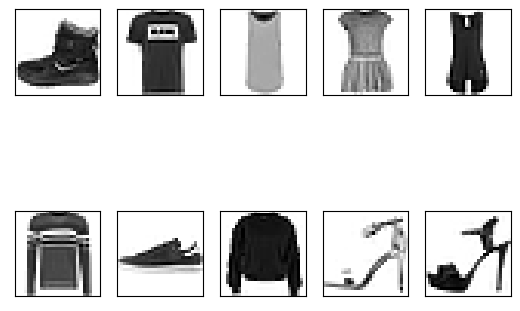

In [9]:
# show first 10 images

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

### Build the CNN model
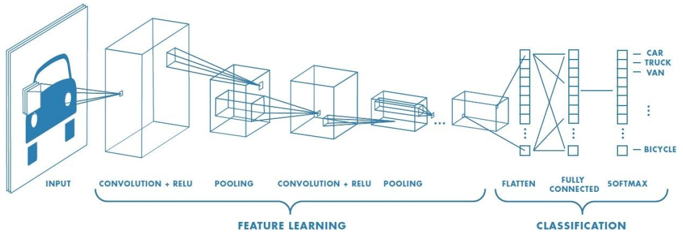

In [10]:
# CNN model with 2 convolution layers 
#    1. 32 3x3 filters, padding="same", input_shape = (28, 28, 1), activation="relu"
#    2. 64 3x3 filters, activation="relu"
# and max pooling layer with size=2
# and 2 dense layers (128, 10)
#    3. 128, activation="relu"
#    4. 10, activation="softmax"
layers = tf.keras.layers
num_classes = 10

base_model = tf.keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

### Compile the model

In [12]:
# compile the model with loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']
base_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


### Train the model

In [13]:
# train the CNN model with X_train, y_train, 10 epochs, validation_data=(X_test, y_test)
base_history = base_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.3567 - accuracy: 0.8721 - val_loss: 0.2783 - val_accuracy: 0.8981
Epoch 2/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.2202 - accuracy: 0.9190 - val_loss: 0.2366 - val_accuracy: 0.9119
Epoch 3/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.1706 - accuracy: 0.9367 - val_loss: 0.2339 - val_accuracy: 0.9174
Epoch 4/10
1875/1875 [==============================] - 89s 47ms/step - loss: 0.1289 - accuracy: 0.9517 - val_loss: 0.2393 - val_accuracy: 0.9245
Epoch 5/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0963 - accuracy: 0.9637 - val_loss: 0.2749 - val_accuracy: 0.9191
Epoch 6/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0698 - accuracy: 0.9744 - val_loss: 0.2968 - val_accuracy: 0.9244
Epoch 7/10
1875/1875 [==============================] - 100s 54ms/step - loss: 0.0515 - accuracy: 0.9814 - val_loss: 0.376

### Plot the loss

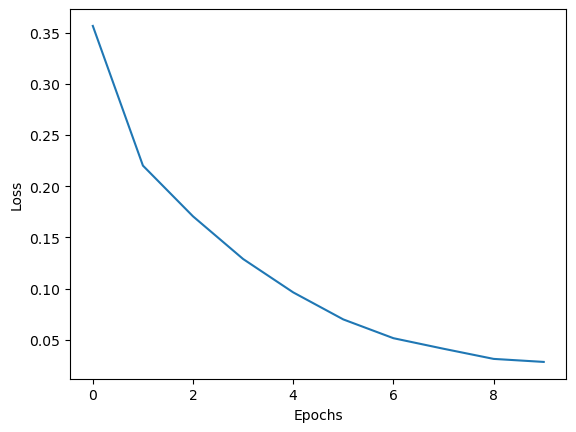

In [14]:
# plot the loss. use history.history['loss']
plt.plot(base_history.epoch, base_history.history['loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Evaluate the base model

In [15]:
# Train and test accuracy. use evaluate()

loss, acc = base_model.evaluate(X_train, y_train)
print('Train accuracy : %.4f' % acc)
loss, acc = base_model.evaluate(X_test, y_test)
print('Test accuracy : %.4f' % acc)

1875/1875 [==============================] - 13s 7ms/step - loss: 0.0125 - accuracy: 0.9959
Train accuracy : 0.9959
313/313 [==============================] - 2s 8ms/step - loss: 0.4569 - accuracy: 0.9260
Test accuracy : 0.9260


### The model with dropout regularization
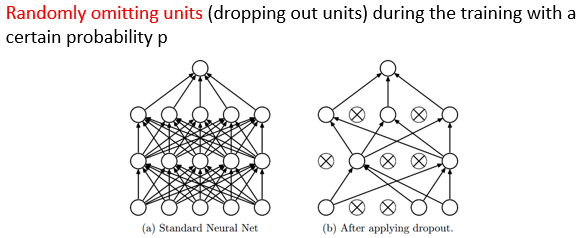

In [16]:
# Base CNN model + dropout with 0.5 before the last layer
dropout_model = tf.keras.models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), padding="same", input_shape=(28, 28, 1), activation="relu"),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

### Compile the dropout model

In [17]:
# compile the model
dropout_model.compile(loss='sparse_categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

### Train the dropout model

In [22]:
# train the dropout model with X_train, y_train, 10 epochs, validation_data=(X_test, y_test)
drop_history = dropout_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.4441 - accuracy: 0.8443 - val_loss: 0.2912 - val_accuracy: 0.8918
Epoch 2/10
1875/1875 [==============================] - 94s 50ms/step - loss: 0.2931 - accuracy: 0.8936 - val_loss: 0.2599 - val_accuracy: 0.9054
Epoch 3/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.2469 - accuracy: 0.9095 - val_loss: 0.2389 - val_accuracy: 0.9130
Epoch 4/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.2136 - accuracy: 0.9223 - val_loss: 0.2282 - val_accuracy: 0.9183
Epoch 5/10
1875/1875 [==============================] - 110s 59ms/step - loss: 0.1877 - accuracy: 0.9305 - val_loss: 0.2205 - val_accuracy: 0.9237
Epoch 6/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.1645 - accuracy: 0.9389 - val_loss: 0.2282 - val_accuracy: 0.9196
Epoch 7/10
1875/1875 [==============================] - 100s 54ms/step - loss: 0.1461 - accuracy: 0.9447 - val_loss: 0.23

### Plot the loss

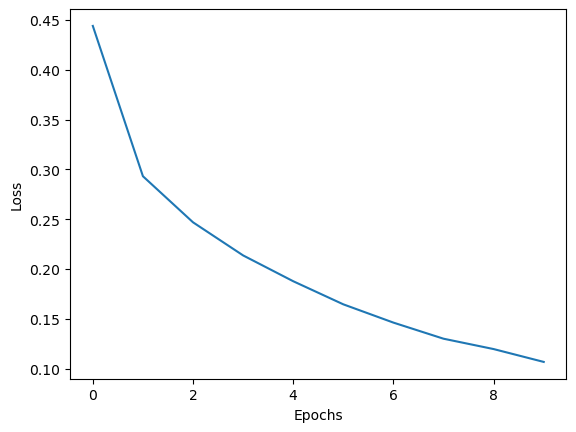

In [23]:
# plot the loss. use history.history['loss']
plt.plot(drop_history.epoch, drop_history.history['loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Evaluate the dropout model

In [24]:
# Train and test accuracy. use evaluate()
loss, acc = dropout_model.evaluate(X_train, y_train)
print('Train accuracy : %.4f' % acc)
loss, acc = dropout_model.evaluate(X_test, y_test)
print('Test accuracy : %.4f' % acc)

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0575 - accuracy: 0.9788
Train accuracy : 0.9788
313/313 [==============================] - 2s 8ms/step - loss: 0.2781 - accuracy: 0.9240
Test accuracy : 0.9240


### Plotting the learning curves

(0.0, 9.0)

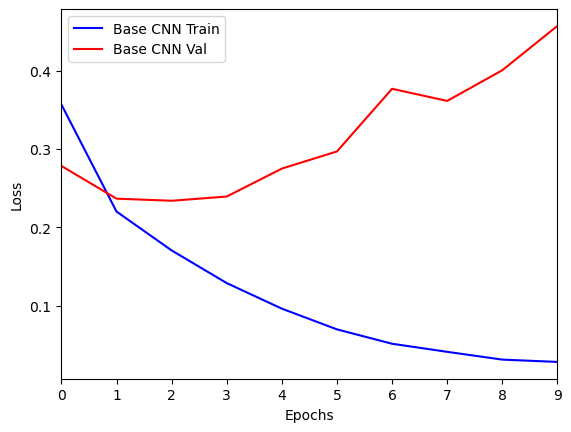

In [25]:
# plot the train/validation losses for each model
plt.plot(base_history.epoch, base_history.history['loss'], color='blue', label='Base CNN Train')
plt.plot(base_history.epoch, base_history.history['val_loss'], color='red', label='Base CNN Val')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xlim([0,max(base_history.epoch)])

(0.0, 9.0)

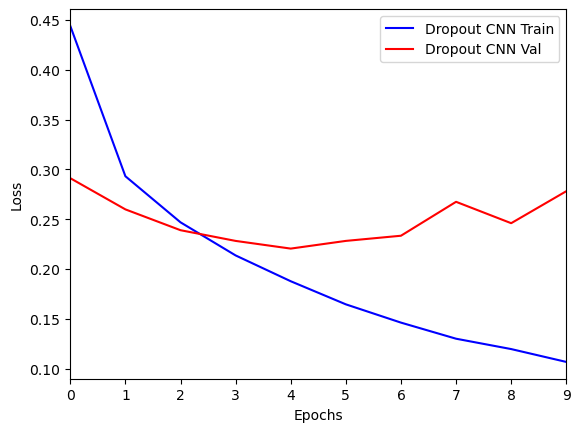

In [26]:
# plot the train/validation losses for each model
plt.plot(drop_history.epoch, drop_history.history['loss'], color='blue', label='Dropout CNN Train')
plt.plot(drop_history.epoch, drop_history.history['val_loss'], color='red', label='Dropout CNN Val')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xlim([0,max(drop_history.epoch)])

---

---

---